In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("wholesale.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(df)

In [4]:
from sklearn.cluster import KMeans
sse = []
for cluster in range(1,20):
    km = KMeans(n_init = 2, n_clusters = cluster, init='k-means++')
    km.fit(scaled_data)
    sse.append(km.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':sse})
frame.head()

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

,Cluster,SSE
0,1,3520.000000
1,2,2599.387385
2,3,2149.283956
3,4,1851.840872
4,5,1705.630253


Text(0, 0.5, 'Inertia')

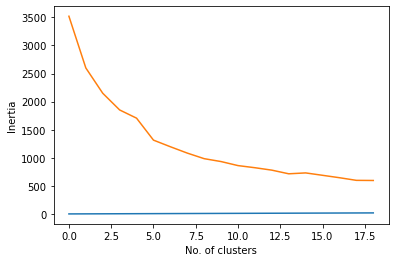

In [5]:
import matplotlib.pyplot as plt
plt.plot(frame)
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')

In [6]:
kmeans = KMeans(n_init = 2, n_clusters = 5, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0    211
1    126
3     92
4     10
2      1
Name: cluster, dtype: int64